In [56]:
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import pandas as pd
import numpy as np

In [1]:
import pandas as pd
import pickle
from datetime import datetime, date, time

# Loading and processing of the quotes:
In the src folder, there is data_processing.py containing two functions to (pre)process the quotes:
- The fist is keywords_search. This function is able to load the full dataset (180 millions quotes from 2008-2020) and selectively sort the quotes in order to keep only the quotes containing at least one of the provided keyword (climate change related word in our case).
- The second function is add_speakers_attributes. This function add the speakers attributes to each quote. It will be useful for the future data analysis.
After these preprocessing steps, we kept an example dataset containing 235179 quotes. All these quotes contain "climate change" and the speakers attributes have been added. This dataset was used here for these first tests and it is possible to download it following this link:
https://drive.google.com/drive/folders/1QV4S9l02kFwlpryUmFWhpD-DdKDrKxGe

In [58]:
#Observe what the data look like
pd.set_option('display.max_columns', 500)
df1 = pd.read_pickle("data/quotations_climate_change_example.pkl")
df1.head(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_aliases,speaker_date_of_birth,speaker_nationality,speaker_gender,speaker_lastrevid,speaker_ethnic_group,speaker_US_congress_bio_ID,speaker_occupation,speaker_party,speaker_academic_degree,speaker_label,speaker_candidacy,speaker_type,speaker_religion,speaker_age
12,2008-10-06-049386,the report of the ipcc has once again made it ...,angela merkel,[Q567],2008-10-06 17:57:30,1,"[[angela merkel, 0.5284], [stephen harper, 0.2...",[http://thestar.com/federalelection/article/51...,A,"[[Angela Dorothea Merkel, Angela Kasner, Angel...",[[1954-07-17 00:00:00]],"[[Q183, Q16957]]",[[Q6581072]],[1394947627],[[Q42884]],[None],"[[Q82955, Q169470, Q372436, Q593644]]","[[Q49762, Q677182]]",[[Q849697]],[Angela Merkel],"[[Q555931, Q15062956, Q704648, Q702017, Q70464...",[item],"[[Q170111, Q75809]]",[54.26]
27,2008-09-30-024209,"if we don't do that we will, in effect, just e...",andrew robb,"[Q16775656, Q4758396]",2008-09-30 08:12:24,1,"[[andrew robb, 0.5212], [ross garnaut, 0.2505]...","[http://theaustralian.news.com.au/story/0,2519...",A,"[None, None]","[None, [1951-08-20 00:00:00]]","[None, [Q408]]","[[Q6581097], [Q6581097]]","[1214079162, 1344599995]","[None, None]","[None, None]","[[Q33999], [Q82955]]","[None, [Q241149]]","[None, None]","[Andrew Robb, Andrew Robb]","[None, None]","[item, item]","[None, [Q9592]]","[None, 57.15]"
34,2008-09-28-029502,that's why five million canadians don't have a...,jack layton,[Q317842],2008-09-28 00:40:01,1,"[[jack layton, 0.3879], [stephane dion, 0.1554...",[http://straight.com/article-164134/jack-layto...,A,"[[John G Layton, John Gilbert ""Jack"" Layton]]",[[1950-07-18 00:00:00]],[[Q16]],[[Q6581097]],[1389212922],[None],[None],"[[Q82955, Q1622272, Q1238570]]",[[Q130765]],[None],[Jack Layton],"[[Q1466815, Q41302]]",[item],[None],[58.24]
50,2008-11-10-021281,if humanity wishes to preserve a planet simila...,james hansen,"[Q21556323, Q58205689, Q724095]",2008-11-10 21:00:33,2,"[[james hansen, 0.5719], [barack obama, 0.291]...",[http://worldchanging.com/archives/009011.html...,A,"[[James L. Hansen, James Hansen], [James Hanse...","[[1918-01-01 00:00:00], None, [1941-03-29 00:0...","[[Q30], None, [Q30]]","[[Q6581097], [Q6581097], [Q6581097]]","[1329307707, 1365395662, 1323494364]","[None, None, None]","[None, None, None]","[[Q1281618], [Q1650915], [Q169470, Q1622272, Q...","[None, None, None]","[None, None, None]","[James Lee Hansen, James W. Hansen, James Edwa...","[None, None, None]","[item, item, item]","[None, None, None]","[90.92, None, 67.67]"
53,2008-11-27-035032,the demands on planning and the built environm...,kate henderson,"[Q21466149, Q6375532]",2008-11-27 08:40:54,1,"[[kate henderson, 0.5763], [None, 0.4237]]",[http://24dash.com/news/Housing/2008-11-26-TCP...,A,"[None, None]","[[1970-01-01 00:00:00], None]","[None, None]","[[Q6581072], [Q6581072]]","[1370749841, 1316310835]","[None, None]","[None, None]","[[Q1028181], [Q37226]]","[None, None]","[None, None]","[Kate Henderson, Kate Henderson]","[None, None]","[item, item]","[None, None]","[38.93, None]"
95,2008-11-26-027737,international aviation falls outside the kyoto...,martin ferguson,"[Q466245, Q6775421]",2008-11-26 00:28:55,1,"[[martin ferguson, 0.5257], [None, 0.4743]]",[http://canberratimes.com.au/news/local/news/g...,A,"[None, None]","[[1953-12-12 00:00:00], [1942-12-21 00:00:00]]","[[Q408], [Q145]]","[[Q6581097], [Q6581097]]","[1344577186, 1392687265]","[None, None]","[None, None]","[[Q82955, Q15627169], [Q937857, Q628099]]","[[Q216082], None]","[None, None]","[Martin Ferguson, Martin Ferguson]","[None, None]","[item, item]","[None, None]","[54.99, 65.98]"
105,2008-12-03-049400,the gatherers investigates urban landscapes an...,brian andrews,"[Q2924842, Q4962982, Q4962983]",2008-12-03 23:11:35,1,"[[brian andrews, 0.3579], [amy franceschini, 0...",[http://sf.metblogs.com/2008/12/03/galleries-a...,A,"[None, None, None]","[[1980-02-17 00:00:00], [1955-06-05 00:00:00],

Text(0, 0.5, 'Number occurrence')

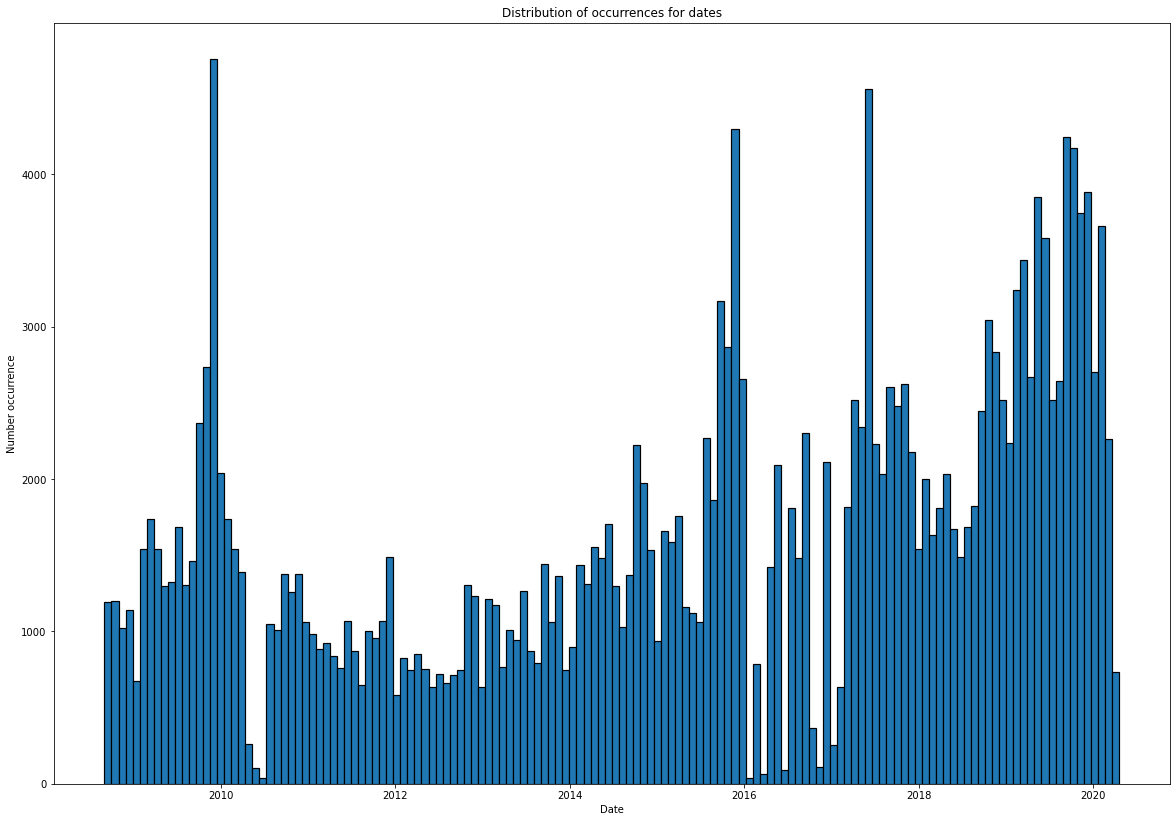

In [59]:
#Transform dates from string to datetime
df1["date"] = pd.to_datetime(df1["date"])
#Sorting of dates for further plotting
df1 = df1.sort_values(by="date")
#Isolate date of quotation to observe tendencies overtime
quote_dates = df1.loc[:,'date']
fig, ax = plt.subplots(1,1, figsize=(20, 14)) # Subplots initialization
ax.hist(quote_dates, bins = 144,edgecolor='black', linewidth=1.2) # Plot of the first histogram (number occurrences)
ax.set_title('Distribution of occurrences for dates')
ax.set_xlabel('Date')
ax.set_ylabel('Number occurrence')

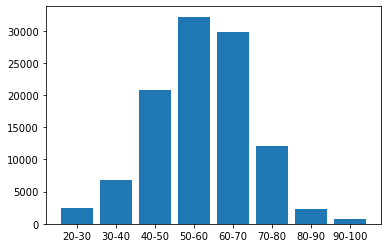

<class 'numpy.int64'>


In [60]:
#Filtering with regard to [speaker_age] in order to sort speakers depending on their age by removing the following values: 'None', 'NOT_KNOWN', 'NOT_FOUND'
mask = (df1['speaker_age'].str.len() == 1) & ~(df1['speaker_age'].astype(str).str.contains('NOT_KNOWN'))  & ~(df1['speaker_age'].astype(str).str.contains('None')) & ~(df1['speaker_age'].astype(str).str.contains('NOT_FOUND'))
df1_filtered = df1[mask]
#Isolate speaker ages
speaker_ages = df1_filtered['speaker_age'].apply(lambda x:x[0])
#Count of speakers for ages spanning over a decade (20 years old to 30, 30 years old to 40 etc)
twenty_thirty = speaker_ages[(speaker_ages >= 20) & (speaker_ages < 30)].count()
thirty_forty = speaker_ages[(speaker_ages >= 30) & (speaker_ages < 40)].count()
forty_fifty = speaker_ages[(speaker_ages >= 40) & (speaker_ages < 50)].count()
fifty_sixty = speaker_ages[(speaker_ages >= 50) & (speaker_ages < 60)].count()
sixty_seventy = speaker_ages[(speaker_ages >= 60) & (speaker_ages < 70)].count()
seventy_eighty = speaker_ages[(speaker_ages >= 70) & (speaker_ages < 80)].count()
eighty_ninety = speaker_ages[(speaker_ages >= 80) & (speaker_ages < 90)].count()
ninety_hundred = speaker_ages[(speaker_ages >= 90) & (speaker_ages < 100)].count()

#plotting of ages
age_ranges = ['20-30', '30-40', '40-50', 
        '50-60', '60-70', '70-80','80-90','90-100']
  
data = [twenty_thirty, thirty_forty, forty_fifty, fifty_sixty, sixty_seventy, seventy_eighty,eighty_ninety,ninety_hundred]

plt.bar(age_ranges,data)

  
# show plot
plt.show()
print(type(twenty_thirty))
#= df1_filtered[(df1_filtered['speaker_age'].astype(str).astype(float64) >= 20) &  (df1_filtered['speaker_age'].astype(str).astype(int) < 30)]['speaker_age'].count()